In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import warnings
warnings.simplefilter(action="ignore")

### IMPORTING & MERGING DATA

In [ ]:
# Importing data 1
data1 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2009-2010")

In [ ]:
data1.head()

In [ ]:
# Importing data 2
data2 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2010-2011")

In [ ]:
data2.head()

In [ ]:
# Merging the datasets into one dataset
data = data1.append(data2).reset_index(drop=True)

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data[data["Invoice"].str.contains("C", na=False)].to_excel("returned_orders.xlsx")

### EXPLORATORY DATA ANALYSIS

In [ ]:
data.isnull().sum()

In [ ]:
#Analyzing the missing Customer ID values
data[data["Customer ID"].isnull()].head()

In [ ]:
#Country distribution of missing values
data[data["Customer ID"].isnull()]["Country"].value_counts()

In [ ]:
#Is the distribution of missing value familiar to distribution of whole dataset ? 
data[data["Customer ID"].isnull()]["Country"].value_counts(normalize = True)

In [ ]:
data.Country.value_counts(normalize=True)

In [ ]:
data.describe().T

In [ ]:
# Missing Values
data.dropna(axis=0 , inplace=True)

In [ ]:
# Products that may be returned 
data[data["Invoice"].str.contains("C", na=False)].head()

In [ ]:
#Distribution of the returned products by Country
data[data["Invoice"].str.contains("C", na=False)]["Country"].value_counts(normalize=True).head()

In [ ]:
# Drop the returned products' rows
data = data[~data["Invoice"].str.contains("C", na=False)]

In [ ]:
#Products are sold withoud payment
data[(data["Quantity"] > 0) & (data["Price"] == 0)].head()


In [ ]:
# Drop the products that are not sold as promotion withoud payment
data = data[~((data["Quantity"] < 0) & (data["Price"] == 0))]

In [ ]:
# Rearange the dataset as positive Price Value
data = data[data["Price"] >= 0]

In [ ]:
#Drop the unspecified countries
Unspecified_country = data.loc[data["Country"] == "Unspecified"]
data.drop(Unspecified_country.index, inplace = True)

In [ ]:
#Check the final data out
print("*************************************************************************")
print("The Final Shape of The Data")
print(data.shape)
print("*************************************************************************")
print("The Final Descriptive Statistics of The Data")
print(data.describe().T)
print("*************************************************************************")
print("The Final Check of The Null Values")
print(data.isnull().sum())
print("*************************************************************************")
print(data.dtypes)

In [ ]:
#Checking the success of the drop processes
print(data[data["Price"] < 0])
print("*************************************************************************")
print(data[data["Quantity"] <= 0])
print("*************************************************************************")

In [ ]:
#Examining the categorical, numeric columns
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"] # 0 ,1
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"] # name, master_id
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(data)

In [ ]:
for col in cat_but_car:
    print(data[col].value_counts(normalize=True).head())

In [ ]:
#Analysis of the categorical variable
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
for col in cat_but_car:
    print(cat_summary(data, col,plot=False))

In [ ]:
#Analysis of the Numeric Variables
def num_summary(dataframe, numerical_col, plot=True):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(data, col, plot=False)

### OUTLIERS ANALYSIS

In [ ]:
data.describe().T

In [ ]:
#IQR * 1.5
IQR = (data.quantile(0.75) - data.quantile(0.25)) * 1.5
IQR

In [ ]:
IQR.Price

In [ ]:
IQR.Quantity

In [ ]:
data[(data["Price"] < (data["Price"].quantile(0.25) - IQR.Price))].head()

In [ ]:
Price_Positive_Outliers = data[(data["Price"] > (data["Price"].quantile(0.75) + IQR.Price))]
Price_Positive_Outliers.to_excel("Price_Positive_Outliers.xlsx")

In [ ]:
data = data[~(data["Price"] > (data["Price"].quantile(0.75) + IQR.Price))]

In [ ]:
Quantity_Positive_Outliers = data[(data["Quantity"] > (data["Quantity"].quantile(0.75) + IQR.Quantity))]
Quantity_Positive_Outliers.to_excel("Quantity_Positive_Outliers.xlsx")

In [ ]:
data = data[~(data["Quantity"] > (data["Quantity"].quantile(0.75) + IQR.Quantity))]

In [ ]:
data = data[~(data["Quantity"] < (data["Quantity"].quantile(0.25) - IQR.Quantity))]

In [ ]:
for i in ["Price", "Quantity"]:
    print(data[i].max(), data[i].min())

In [ ]:
data.Price.hist()

In [ ]:
data.Quantity.hist()

In [ ]:
Price_Positive_Outliers["Price"].hist()

In [ ]:
Quantity_Positive_Outliers["Quantity"].hist()

In [ ]:
Price_Positive_Outliers.shape

In [ ]:
Quantity_Positive_Outliers.shape

In [ ]:
data.shape

In [ ]:
#The product as a transportation service
Postage = data[data["Description"] == "POSTAGE"]
Postage.to_excel("Postage.xlsx")

In [ ]:
Postage.shape

In [ ]:
Postage["Country"].value_counts(normalize=True)

In [ ]:
data.drop(Postage.index, inplace=True)

In [ ]:
data.shape

### Turn the Dataset into Useful for Analysis

In [ ]:
#Adding a new column as Revenue
data["Revenue"] = data["Quantity"] * data["Price"]

In [ ]:
#Adding a new column as days of the week
day_of_week = []
for i in data["InvoiceDate"]:
    day_of_week.append(i.day_name())
data["Day of Week"] = day_of_week


In [ ]:
data.head()

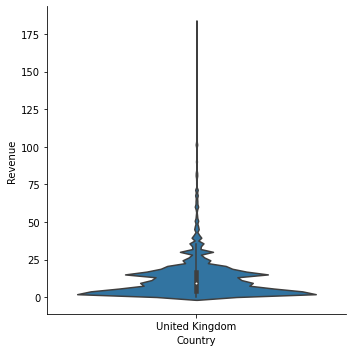

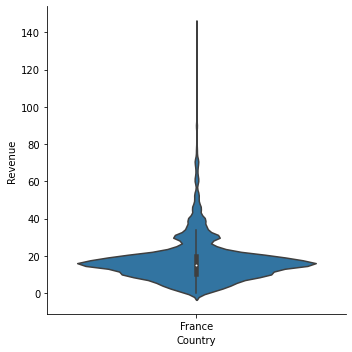

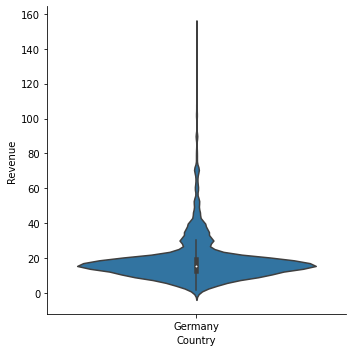

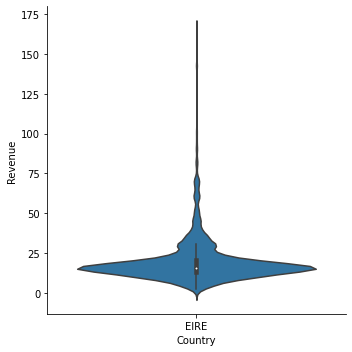

In [75]:
#Revenue Analysis by Countries
countries = ["United Kingdom", "France", "Germany","EIRE"]
for c in countries:
    sns.catplot(data = data[data["Country"] == c] , x = "Country", y = "Revenue", kind = "violin")


In [ ]:
for c in countries:
    sns.catplot(data = data[data["Country"] == c] , x = "Country", y = "Price", kind = "violin")

In [ ]:
for c in countries:
    sns.catplot(data = data[data["Country"] == c] , x = "Country", y = "Quantity", kind = "violin")

others_countries = Others.Country
for i in others_countries:
    print(sns.boxplot(data = Others[Others["Country"] == i], x = "Country", y = "Revenue"))
    plt.show()

In [ ]:
#Quantity Analysis by Countries
data.groupby("Country").agg({"Quantity" : "sum"}).sort_values(by="Quantity", ascending=False).head(4)

In [ ]:
data[(data["Description"] == "POSTAGE") & (data["Country"] == "United Kingdom")].nunique()

others_countries = Others.Country
for i in others_countries:
    print(sns.boxplot(data = Others[Others["Country"] == i], x = "Country", y = "Quantity"))
    plt.show()

### Questions for Analysing Data 

In [ ]:
UK = data[data["Country"] == "United Kingdom"]
France = data[data["Country"] == "France"]
Germany = data[data["Country"] == "Germany"]
Ireland = data[data["Country"] == "EIRE"]

In [ ]:
data.shape

In [ ]:
UK.to_excel("UK.xlsx")
France.to_excel("France.xlsx")
Germany.to_excel("Germany.xlsx")
Ireland.to_excel("Ireland.xlsx")

In [ ]:
data.to_excel("clean_data.xlsx")

In [ ]:
#What are the total revenue, average revenue and its standard deviation by Invoice ? 
UK.groupby("Invoice").agg({"Revenue" : ["sum", "mean", "std"]}).sort_values(by = ("Revenue", "sum"),ascending=False).head()

In [ ]:
France.groupby(["Invoice"]).agg({"Revenue" : ["sum", "mean", "std"]}).sort_values(by = ("Revenue", "sum"),ascending=False).head()

In [ ]:
Germany.groupby(["Invoice"]).agg({"Revenue" : ["sum", "mean", "std"]}).sort_values(by = ("Revenue", "sum"),ascending=False).head()

In [ ]:
Ireland.groupby(["Invoice"]).agg({"Revenue" : ["sum", "mean", "std"]}).sort_values(by = ("Revenue", "sum"),ascending=False).head()

In [ ]:
#Visualizing the conclusion
sns.catplot(data = UK.groupby("Invoice").agg({"Revenue" : ["sum", "mean", "std"]}), kind = "boxen")

In [ ]:
#What are the purchases of products ? 
UK.groupby("StockCode").agg({"Invoice" : "count"}).sort_values(by = "Invoice", ascending = False).head()

In [ ]:
France.groupby("StockCode").agg({"Invoice" : "count"}).sort_values(by = "Invoice", ascending = False).head()

In [ ]:
Germany.groupby("StockCode").agg({"Invoice" : "count"}).sort_values(by = "Invoice", ascending = False).head()

In [ ]:
Ireland.groupby("StockCode").agg({"Invoice" : "count"}).sort_values(by = "Invoice", ascending = False).head()

In [ ]:
#Visualizing the conclusion
UK.groupby("StockCode").agg({"Invoice" : "count"}).hist()

In [ ]:
# What are the total and average number of products that exist in invoices ? 
UK.groupby("Invoice").agg({"Quantity" : ["sum", "mean"]}).sort_values(by = ("Quantity","sum"), ascending= False).head()

In [ ]:
France.groupby("Invoice").agg({"Quantity" : ["sum", "mean"]}).sort_values(by = ("Quantity","sum"), ascending= False).head()

In [ ]:
Germany.groupby("Invoice").agg({"Quantity" : ["sum", "mean"]}).sort_values(by = ("Quantity","sum"), ascending= False).head()

In [ ]:
Ireland.groupby("Invoice").agg({"Quantity" : ["sum", "mean"]}).sort_values(by = ("Quantity","sum"), ascending= False).head()

In [ ]:
sns.catplot(data = UK.groupby("Invoice").agg({"Quantity" : ["sum", "mean"]}), kind = "boxen")

In [ ]:
# What is the total revenue by date ? 
UK.groupby("InvoiceDate").agg({"Revenue" : "sum"}).sort_values(by="Revenue", ascending = False).head()

In [ ]:
France.groupby("InvoiceDate").agg({"Revenue" : "sum"}).sort_values(by="Revenue", ascending = False).head()

In [ ]:
Germany.groupby("InvoiceDate").agg({"Revenue" : "sum"}).sort_values(by="Revenue", ascending = False).head()

In [ ]:
Ireland.groupby("InvoiceDate").agg({"Revenue" : "sum"}).sort_values(by="Revenue", ascending = False).head()

In [ ]:
#Visualizing the results
sns.catplot(data = UK.groupby("InvoiceDate").agg({"Revenue" : "sum"}), kind = "violin")

In [ ]:
#What is the total number of invoice by date ? 
UK.groupby("InvoiceDate").agg({"Invoice" : "count"}).sort_values(by="Invoice", ascending = False).head()

In [ ]:
France.groupby("InvoiceDate").agg({"Invoice" : "count"}).sort_values(by="Invoice", ascending = False).head()

In [ ]:
Germany.groupby("InvoiceDate").agg({"Invoice" : "count"}).sort_values(by="Invoice", ascending = False).head()

In [ ]:
Ireland.groupby("InvoiceDate").agg({"Invoice" : "count"}).sort_values(by="Invoice", ascending = False).head()

In [ ]:
#Visualizing the results
sns.catplot(data = UK.groupby("InvoiceDate").agg({"Invoice" : "count"}), kind = "boxen")

In [ ]:
#What is the number of invoices by the days of the week ? 
UK.groupby("Day of Week").agg({"Invoice" : "count"}).sort_values(by="Invoice", ascending = False).head(7)

In [ ]:
France.groupby("Day of Week").agg({"Invoice" : "count"}).sort_values(by="Invoice", ascending = False).head(7)

In [ ]:
Germany.groupby("Day of Week").agg({"Invoice" : "count"}).sort_values(by="Invoice", ascending = False).head(7)

In [ ]:
Ireland.groupby("Day of Week").agg({"Invoice" : "count"}).sort_values(by="Invoice", ascending = False).head(7)

In [ ]:
sns.catplot(data = UK.groupby("Day of Week").agg({"Invoice" : "count"}), kind = "violin")

In [ ]:
#What is the total revenue by the days of the week ? 
UK.groupby("Day of Week").agg({"Revenue" : "sum"}).sort_values(by="Revenue", ascending = False).head(7)

In [ ]:
France.groupby("Day of Week").agg({"Revenue" : "sum"}).sort_values(by="Revenue", ascending = False).head(7)

In [ ]:
Germany.groupby("Day of Week").agg({"Revenue" : "sum"}).sort_values(by="Revenue", ascending = False).head(7)

In [ ]:
Ireland.groupby("Day of Week").agg({"Revenue" : "sum"}).sort_values(by="Revenue", ascending = False).head(7)

In [ ]:
sns.catplot(data = UK.groupby("Day of Week").agg({"Revenue" : "sum"}), kind = "violin")

In [ ]:
#The amount of purchases for each products by invoices and customers ? 
UK.groupby("StockCode").agg({"Invoice" : "count", "Customer ID" : "count"}).sort_values(by = "Invoice", ascending = False).head()

In [ ]:
France.groupby("StockCode").agg({"Invoice" : "count", "Customer ID" : "count"}).sort_values(by = "Invoice", ascending = False).head()

In [ ]:
Germany.groupby("StockCode").agg({"Invoice" : "count", "Customer ID" : "count"}).sort_values(by = "Invoice", ascending = False).head()

In [ ]:
Ireland.groupby("StockCode").agg({"Invoice" : "count", "Customer ID" : "count"}).sort_values(by = "Invoice", ascending = False).head()

In [ ]:
#What are the average prices of the products ? 
UK.groupby("StockCode").agg({"Price" : "mean"}).sort_values(by="Price", ascending = False).head()

In [ ]:
France.groupby("StockCode").agg({"Price" : "mean"}).sort_values(by="Price", ascending = False).head()

In [ ]:
Germany.groupby("StockCode").agg({"Price" : "mean"}).sort_values(by="Price", ascending = False).head()

In [ ]:
Ireland.groupby("StockCode").agg({"Price" : "mean"}).sort_values(by="Price", ascending = False).head()

In [ ]:
#What is the number of products are bought by each customer 
UK.groupby("Customer ID").agg({"StockCode" : "count"}).sort_values(by = "StockCode", ascending = False).head()

In [ ]:
France.groupby("Customer ID").agg({"StockCode" : "count"}).sort_values(by = "StockCode", ascending = False).head()

In [ ]:
Germany.groupby("Customer ID").agg({"StockCode" : "count"}).sort_values(by = "StockCode", ascending = False).head()

In [ ]:
Ireland.groupby("Customer ID").agg({"StockCode" : "count"}).sort_values(by = "StockCode", ascending = False).head()